# Creating spike raster plots

This example demonstrates how spike raster plots
can be easily created with nengo_extras.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nengo
import numpy as np

from nengo_extras.plot_spikes import (
    cluster,
    merge,
    plot_spikes,
    preprocess_spikes,
    sample_by_variance,
)

## Build and run a model

In [2]:
with nengo.Network(seed=1) as model:
    inp = nengo.Node(lambda t: [np.sin(t), np.cos(t)])
    ens = nengo.Ensemble(500, 2)
    nengo.Connection(inp, ens)

    p = nengo.Probe(ens, synapse=0.01)
    p_spikes = nengo.Probe(ens.neurons)

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(5.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

## Simple spike raster plot

We can use the `plot_spikes` function to create a simple spike raster plot.

Text(0, 0.5, 'Neuron number')

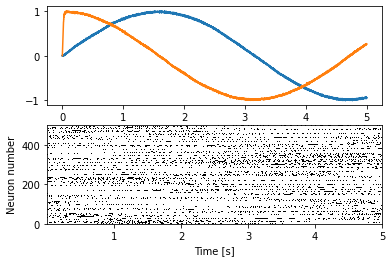

In [4]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[p])

plt.subplot(2, 1, 2)
plot_spikes(sim.trange(), sim.data[p_spikes])
plt.xlabel("Time [s]")
plt.ylabel("Neuron number")

## Improved plot

We can create a more informative plot
with some preprocessing of the spike trains.
Specifically, we subsample interesting ones and sort them by similarity.
Usually, the preprocessing done
with the `preprocess_spikes` function works well.

Text(0, 0.5, 'Neuron number')

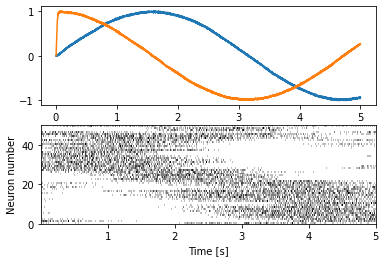

In [5]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[p])

plt.subplot(2, 1, 2)
plot_spikes(*preprocess_spikes(sim.trange(), sim.data[p_spikes]))
plt.xlabel("Time [s]")
plt.ylabel("Neuron number")

There are some arguments that can be passed
to `preprocess_spikes` for fine tuning.
But sometimes it is necessary to change
what things are done during the preprocessing.
The `nengo_extras.plot_spikes` module
provides a number of lower level functions
to construct specific preprocessing pipelines.
This example recreates what `preprocess_spikes` does.

Text(0, 0.5, 'Neuron number')

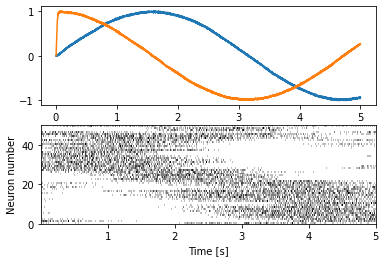

In [6]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[p])

plt.subplot(2, 1, 2)
plot_spikes(
    *merge(
        *cluster(
            *sample_by_variance(
                sim.trange(), sim.data[p_spikes], num=200, filter_width=0.02
            ),
            filter_width=0.002
        ),
        num=50
    )
)
plt.xlabel("Time [s]")
plt.ylabel("Neuron number")